In [69]:
import pandas as pd
import numpy as np
import powerlaw
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [70]:
df = pd.read_csv('videogames.csv')  # Read raw data
df.head()                           # First 5 rows in data

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
print('The data set includes {} unique Publishers'.format(df['Publisher'].nunique()))
print('The data set includes {} unique Developers'.format(df['Developer'].nunique()))
print('The data set includes {} genres'.format(df['Genre'].nunique()))
print('The data set includes {} platforms'.format(df['Platform'].nunique()))

The data set includes 581 unique Publishers
The data set includes 1696 unique Developers
The data set includes 12 genres
The data set includes 31 platforms


In [72]:
df.info()  # Raw info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
Name               16717 non-null object
Platform           16719 non-null object
Year_of_Release    16450 non-null float64
Genre              16717 non-null object
Publisher          16665 non-null object
NA_Sales           16719 non-null float64
EU_Sales           16719 non-null float64
JP_Sales           16719 non-null float64
Other_Sales        16719 non-null float64
Global_Sales       16719 non-null float64
Critic_Score       8137 non-null float64
Critic_Count       8137 non-null float64
User_Score         10015 non-null object
User_Count         7590 non-null float64
Developer          10096 non-null object
Rating             9950 non-null object
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [61]:
df = df.dropna(axis=0, how='any')  # Eliminate rows if they contain any NaN value
df['User_Score'] = df['User_Score'].astype(float)*10
df.info()                          # Info without NaN values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6825 entries, 0 to 16706
Data columns (total 16 columns):
Name               6825 non-null object
Platform           6825 non-null object
Year_of_Release    6825 non-null float64
Genre              6825 non-null object
Publisher          6825 non-null object
NA_Sales           6825 non-null float64
EU_Sales           6825 non-null float64
JP_Sales           6825 non-null float64
Other_Sales        6825 non-null float64
Global_Sales       6825 non-null float64
Critic_Score       6825 non-null float64
Critic_Count       6825 non-null float64
User_Score         6825 non-null float64
User_Count         6825 non-null float64
Developer          6825 non-null object
Rating             6825 non-null object
dtypes: float64(10), object(6)
memory usage: 906.4+ KB


In [62]:
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000
mean,2007.436777,0.394484,0.236089,0.064158,0.082677,0.777590,70.272088,28.931136,71.856264,174.722344
std,4.211248,0.967385,0.687330,0.287570,0.269871,1.963443,13.868572,19.224165,14.399417,587.428538
min,1985.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,5.000000,4.000000
25%,2004.000000,0.060000,0.020000,0.000000,0.010000,0.110000,62.000000,14.000000,65.000000,11.000000
50%,2007.000000,0.150000,0.060000,0.000000,0.020000,0.290000,72.000000,25.000000,75.000000,27.000000
75%,2011.000000,0.390000,0.210000,0.010000,0.070000,0.750000,80.000000,39.000000,82.000000,89.000000
max,2016.000000,41.360000,28.960000,6.500000,10.570000,82.530000,98.000000,113.000000,96.000000,10665.000000


### Scores

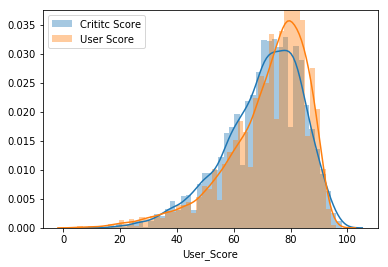

In [30]:
sns.distplot(df['Critic_Score'], label='Crititc Score')
sns.distplot(df['User_Score'], label='User Score')
plt.legend()
plt.show()

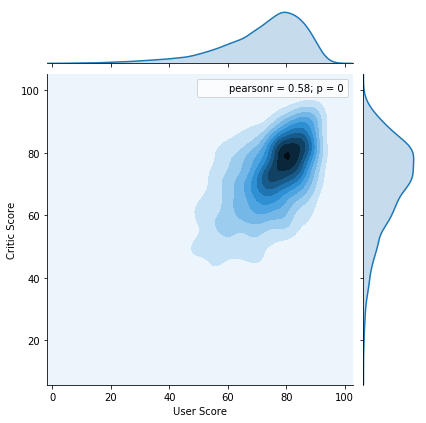

In [397]:
plot = sns.jointplot(x="User_Score", y="Critic_Score", data=df, kind="kde")
plot.set_axis_labels('User Score', 'Critic Score')

## Popular Genre

In [78]:
genres =['Action', 'Sports', 'Shooter', 'Role-Playing', 'Racing', 'Platform',
         'Fighting', 'Simulation', 'Strategy', 'Adventure', 'Puzzle', 'Misc']

for genre in genres:
    print('{:>12} has {:>7.2f} million sales and {:>4} entries in the database'.format(
           genre,
           np.sum(df['Global_Sales'][df['Genre'] == genre]),
           df['Genre'].value_counts()[genre]))

      Action has 1745.27 million sales and 3370 entries in the database
      Sports has 1332.00 million sales and 2348 entries in the database
     Shooter has 1052.94 million sales and 1323 entries in the database
Role-Playing has  934.40 million sales and 1500 entries in the database
      Racing has  728.90 million sales and 1249 entries in the database
    Platform has  828.08 million sales and  888 entries in the database
    Fighting has  447.48 million sales and  849 entries in the database
  Simulation has  390.42 million sales and  874 entries in the database
    Strategy has  174.50 million sales and  683 entries in the database
   Adventure has  237.69 million sales and 1303 entries in the database
      Puzzle has  243.02 million sales and  580 entries in the database
        Misc has  803.18 million sales and 1750 entries in the database


### Popular Platform

In [79]:
plaforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS4', 'XB', 'PS', 'PSP', 'PC',
            'GC', 'GBA', 'XOne', '3DS', 'WiiU', 'PSV', 'DC']

for platform in plaforms:
    print('{:>4} has {:>7.2f} million sales and {:>4} entries in the database'.format(
           platform,
           np.sum(df['Global_Sales'][df['Platform'] == platform]),
           df['Platform'].value_counts()[platform]))

 PS2 has 1255.64 million sales and 2161 entries in the database
X360 has  971.63 million sales and 1262 entries in the database
 PS3 has  939.43 million sales and 1331 entries in the database
 Wii has  908.13 million sales and 1320 entries in the database
  DS has  807.10 million sales and 2152 entries in the database
 PS4 has  314.23 million sales and  393 entries in the database
  XB has  258.26 million sales and  824 entries in the database
  PS has  730.68 million sales and 1197 entries in the database
 PSP has  294.30 million sales and 1209 entries in the database
  PC has  260.30 million sales and  974 entries in the database
  GC has  199.36 million sales and  556 entries in the database
 GBA has  318.50 million sales and  822 entries in the database
XOne has  159.44 million sales and  247 entries in the database
 3DS has  259.09 million sales and  520 entries in the database
WiiU has   82.16 million sales and  147 entries in the database
 PSV has   54.12 million sales and  432 

### Years

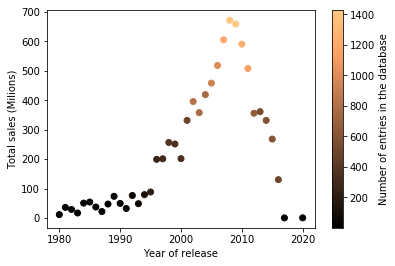

In [73]:
years = sorted(df['Year_of_Release'].value_counts().index)
sales = []

for y in years:
    sales.append(np.sum(df['Global_Sales'][df['Year_of_Release'] == y]))

counts = df['Year_of_Release'].value_counts()
colors = [counts[i] for i in years]

plt.set_cmap('copper')
plt.scatter(years, sales, c=colors)
cb = plt.colorbar()
plt.xlabel('Year of release')
plt.ylabel('Total sales (Milions)')
cb.set_label('Number of entries in the database')
plt.show()

### Region wise sales

In [74]:
def func(x):
    a = zip(x.index, x.values)
    a = np.array(sorted(a))
    return a[:,0], np.cumsum(a[:,1])/len(df)

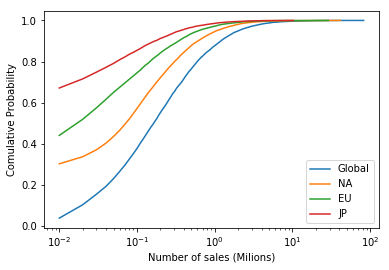

In [75]:
x = df['Global_Sales'].value_counts()
plt.plot(*func(x), label='Global')
x = df['NA_Sales'].value_counts()
plt.plot(*func(x), label='NA')
x = df['EU_Sales'].value_counts()
plt.plot(*func(x), label='EU')
x = df['JP_Sales'].value_counts()
plt.plot(*func(x), label='JP')

plt.xscale('log')
#plt.yscale('log')
plt.legend()
plt.ylabel('Comulative Probability')
plt.xlabel('Number of sales (Milions)')
plt.show()

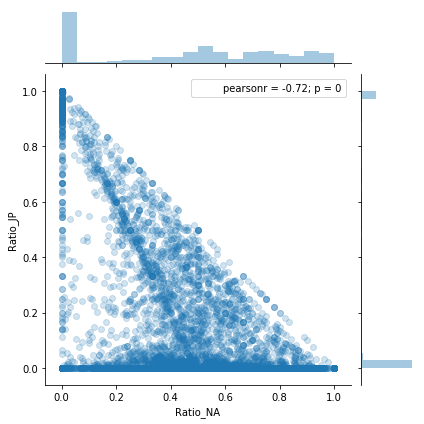

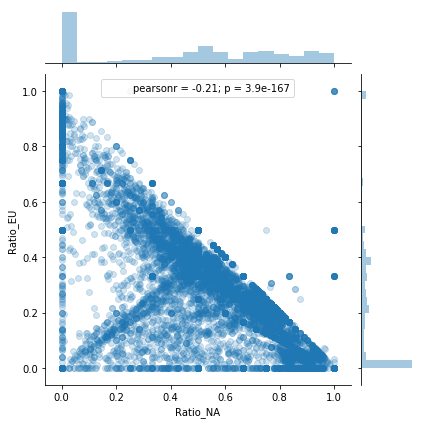

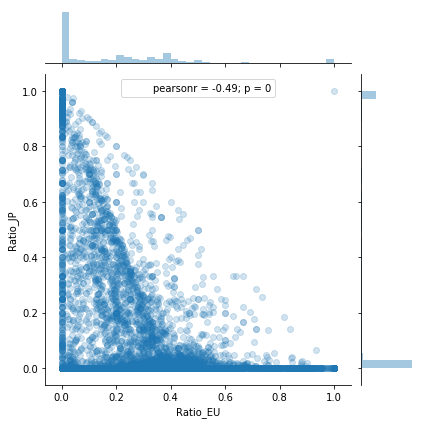

In [76]:
df['Ratio_NA'] = df['NA_Sales']/df['Global_Sales']
df['Ratio_EU'] = df['EU_Sales']/df['Global_Sales']
df['Ratio_JP'] = df['JP_Sales']/df['Global_Sales']
df['Ratio_Other'] = df['Other_Sales']/df['Global_Sales']
sns.jointplot(x="Ratio_NA", y="Ratio_JP", data=df, alpha=0.2)
sns.jointplot(x="Ratio_NA", y="Ratio_EU", data=df, alpha=0.2)
sns.jointplot(x="Ratio_EU", y="Ratio_JP", data=df, alpha=0.2)

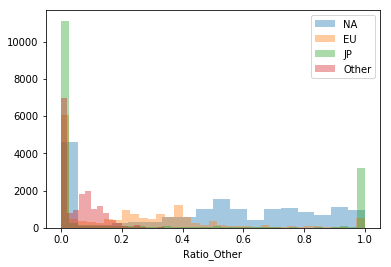

In [77]:
sns.distplot(df['Ratio_NA'], label='NA', kde=False)
sns.distplot(df['Ratio_EU'], label='EU', kde=False)
sns.distplot(df['Ratio_JP'], label='JP', kde=False)
sns.distplot(df['Ratio_Other'], label='Other', kde=False)
plt.legend()
plt.show()

### Shit

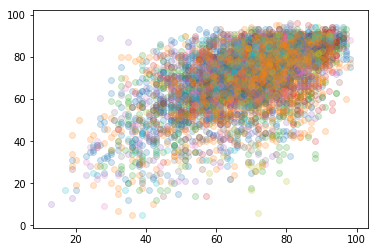

In [406]:
for g in genres:
    plt.scatter(df['Critic_Score'][df['Genre'] == g], df['User_Score'][df['Genre'] == g], alpha=0.2)
plt.show()

In [63]:
from sklearn.model_selection import train_test_split
#df = df[df['Rating'] != 'AO']
#df = df[df['Rating'] != 'K-A']
#df = df[df['Rating'] != 'RP']
classes = df['Platform']
dropped = df[['Year_of_Release', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count']]

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA

LDA = LinearDiscriminantAnalysis(n_components=7)
PCA_ = PCA()
new = PCA_.fit(dropped,classes).transform(dropped)

x_train, x_test, y_train, y_test = train_test_split(dropped,classes,test_size=0.2, random_state=69)

In [64]:
df['Rating'].value_counts()

T       2377
E       2082
M       1433
E10+     930
AO         1
K-A        1
RP         1
Name: Rating, dtype: int64

In [65]:
#print(PCA_.explained_variance_)
#print(PCA_.explained_variance_ratio_)
#print(LDA.explained_variance_ratio_)

In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier

#model = KNeighborsClassifier(n_neighbors=4, algorithm='ball_tree')
#model = SVC(decision_function_shape='ovr', kernel='poly', verbose=2)
#model = GaussianNB()
model = RandomForestClassifier(class_weight = 'balanced', criterion='entropy')

model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [67]:
a = list(zip(['Year_of_Release', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count'],model.feature_importances_))
sorted(a, key=lambda x: x[1], reverse=True)

[('Year_of_Release', 0.30885666371764847),
 ('NA_Sales', 0.11623512188974636),
 ('User_Count', 0.094143914191819306),
 ('EU_Sales', 0.089501326819659485),
 ('Critic_Count', 0.080741608492396796),
 ('Other_Sales', 0.075546147970334376),
 ('Global_Sales', 0.063819335039078856),
 ('JP_Sales', 0.061601410103502993),
 ('User_Score', 0.058199662918277981),
 ('Critic_Score', 0.051354808857535406)]

0.619047619048
[[ 18   0   0   0   0   0   0   0   9   0   0   0   0   0   5   0   0]
 [  0   3   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0]
 [  0   0  35   0   0   1   0   4   1   0  12   0  27   0   8   1   0]
 [  0   0   0  32   4   0   3   3   0   0   0   0   0   0   0  10   0]
 [  0   0   1  10  32   0   0   5   0   0   0   0   0   0   0  24   0]
 [  1   0   2   1   0 120   0   2   0   2   1   0   0   0   3   2   1]
 [  0   0   0   0   0   0  27   6   0   0   0   0   0   0   0   0   0]
 [  0   0   6   0   2   1   5 210   0   0   4   0   1   0   2   1   0]
 [ 12   0  10   0   0   5   0   1  84   0   7   4   6   0  24   0   1]
 [  0   0   0   0   0   2   0   0   4  31   0   2   0   1   0   0   2]
 [  1   0  24   1   1   0   0  13   9   0  29   0   7   0   4   0   0]
 [  1   0   0   0   0   1   0   0  14   1   0   9   0   0   1   0   0]
 [  1   0  22   0   0   3   0   3  10   0   2   0  30   0  16   0   0]
 [  8   0   0   0   0   2   0   0   2   0   0   2   1   4   1 

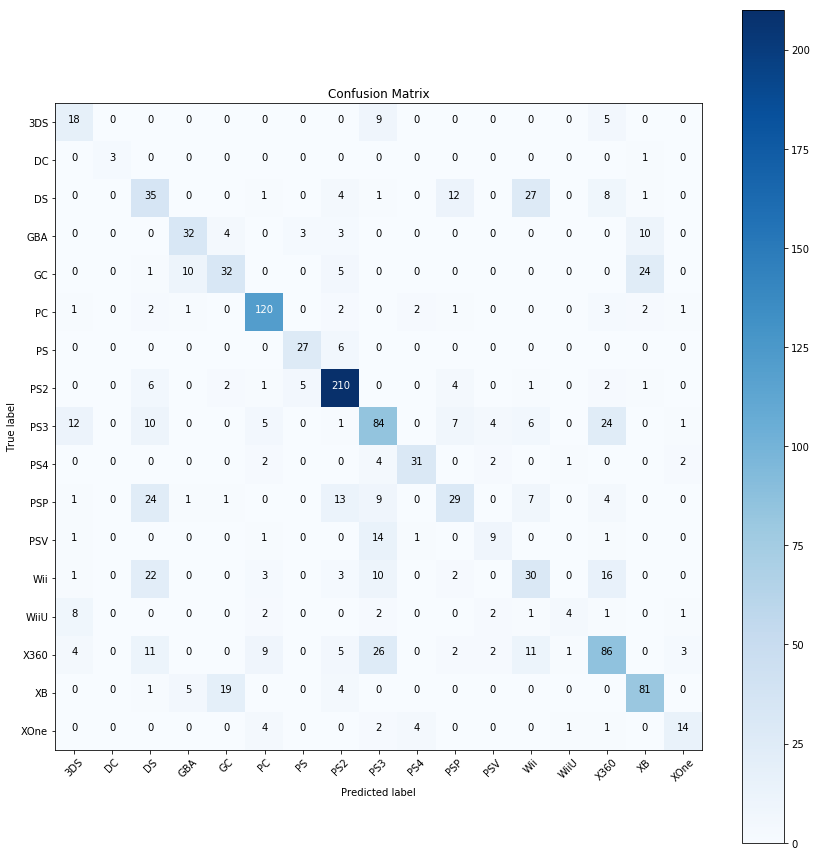

In [68]:
import sys
sys.path.insert(0, '../Data-Mining/')
from tools import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, model.predict(x_test))
print(accuracy_score(y_test, model.predict(x_test)))
print(cm)
plot_confusion_matrix(cm, classes=model.classes_, title='Confusion Matrix')

### Power Law failled attenpts

In [230]:
results = powerlaw.Fit(data=df['Global_Sales'])
print(results.power_law.alpha)
print(results.power_law.xmin)

2.87655769815
4.19


Calculating best minimal value for power law fit
/usr/local/lib/python3.5/dist-packages/powerlaw.py:697: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


191


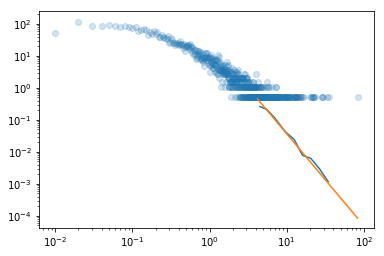

In [237]:
x = df['Global_Sales'].value_counts()
ax = plt.gca()
results.plot_pdf(ax=ax)
results.power_law.plot_pdf(ax=ax)

smallx = x[x.index > results.power_law.xmin]

print(np.sum(smallx.values))

plt.scatter(x.index, x.values/np.sum(smallx.values)*100, alpha=0.2)

#plt.xscale('log')
#plt.yscale('log')
plt.show()